In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import neighbors
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt

# Forceasting with decompasable model
from pylab import rcParams
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# Datetime operations
import time

# Visualisation
import seaborn as sns
plt.style.use('fivethirtyeight')
import pickle
import gc
import warnings
warnings.filterwarnings("ignore")

/home/ghk829/miniconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
import os
os.getcwd()
os.chdir('/home/ghk829/zillow')

In [3]:
start = time.time()
prop_2016 = pd.read_csv('./properties_2016.csv')
train_2016 = pd.read_csv("./train_2016_v2.csv")
prop_2017 = pd.read_csv('./properties_2017.csv')
train_2017 = pd.read_csv('./train_2017.csv')
end = time.time()
for c, dtype in zip(prop_2016.columns, prop_2016.dtypes):	
    if dtype == np.float64:		
        prop_2016[c] = prop_2016[c].astype(np.float32)
        
for c, dtype in zip(prop_2017.columns, prop_2017.dtypes):	
    if dtype == np.float64:		
        prop_2017[c] = prop_2017[c].astype(np.float32)

In [4]:
ref_2017=prop_2017[prop_2017.latitude.isnull()].parcelid
na_2017=prop_2016.query('parcelid in @ref_2017')
prop_2017_2=prop_2017[prop_2017.latitude.notnull()].append(na_2017)

In [5]:
# 2016년 데이터 기준
ref_2016=prop_2016[prop_2016.latitude.isnull()].parcelid
na_2016=prop_2017.query('parcelid in @ref_2016')
prop_2016_2=prop_2016[prop_2016.latitude.notnull()].append(na_2016)

In [6]:
df_train_2016 = train_2016.merge(prop_2016_2, how='left', on='parcelid')
df_train_2017 = train_2017.merge(prop_2017_2, how='left', on='parcelid')
df_train_total = df_train_2016.append(df_train_2017)

In [7]:
df_train_total['year'] = df_train_total.transactiondate.str.slice(0,4)
df_train_total['month'] = df_train_total.transactiondate.str.slice(5,7)

In [8]:
df_train_total

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,year,month
0,11016594,0.027600,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,...,122754.0,360170.0,2015.0,237416.0,6735.879883,NaN,NaN,6.037107e+13,2016,01
1,14366692,-0.168400,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,346458.0,585529.0,2015.0,239071.0,10153.019531,NaN,NaN,NaN,2016,01
2,12098116,-0.004000,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,...,61994.0,119906.0,2015.0,57912.0,11484.480469,NaN,NaN,6.037464e+13,2016,01
3,12643413,0.021800,2016-01-02,1.0,NaN,NaN,2.0,2.0,NaN,4.0,...,171518.0,244880.0,2015.0,73362.0,3048.739990,NaN,NaN,6.037296e+13,2016,01
4,14432541,-0.005000,2016-01-02,NaN,NaN,NaN,2.5,4.0,NaN,NaN,...,169574.0,434551.0,2015.0,264977.0,5488.959961,NaN,NaN,6.059042e+13,2016,01
5,11509835,-0.270500,2016-01-02,1.0,NaN,NaN,4.0,4.0,NaN,1.0,...,880650.0,2447951.0,2015.0,1567301.0,27126.570312,NaN,NaN,6.037621e+13,2016,01
6,12286022,0.044000,2016-01-02,NaN,NaN,NaN,1.0,2.0,NaN,7.0,...,64549.0,111521.0,2015.0,46972.0,2304.969971,NaN,NaN,6.037542e+13,2016,01
7,17177301,0.163800,2016-01-02,NaN,NaN,NaN,2.5,3.0,NaN,NaN,...,107000.0,306000.0,2015.0,199000.0,3745.500000,NaN,NaN,6.111003e+13,2016,01
8,14739064,-0.003000,2016-01-02,NaN,NaN,NaN,1.0,2.0,NaN,NaN,...,66834.0,210064.0,2015.0,143230.0,2172.879883,NaN,NaN,6.059042e+13,2016,01
9,14677559,0.084300,2016-01-03,NaN,NaN,NaN,2.0,2.0,NaN,NaN,...,109977.0,190960.0,2015.0,80983.0,1940.260010,NaN,NaN,6.059063e+13,2016,01


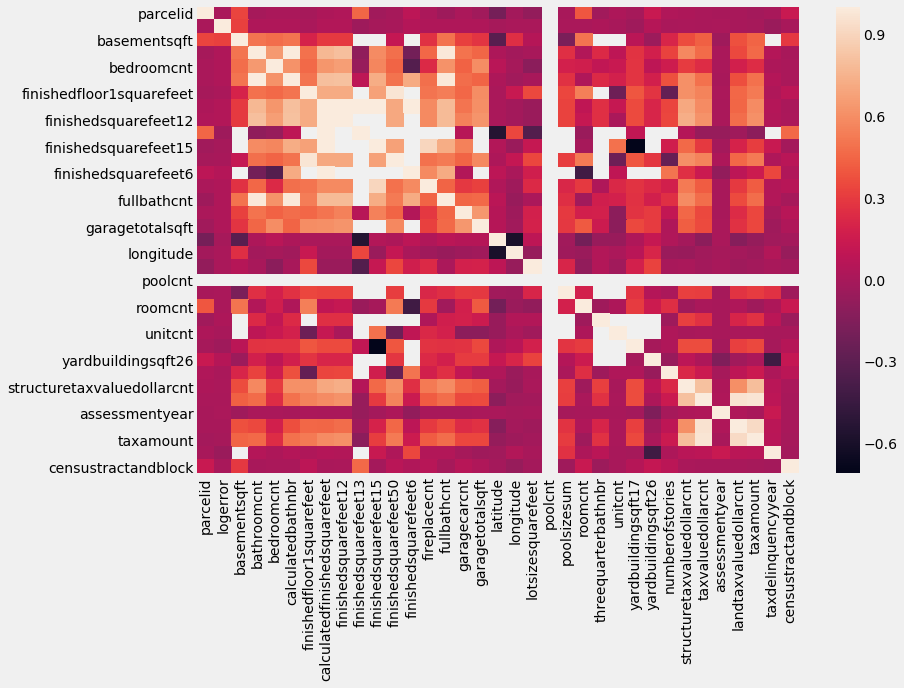

In [9]:
#Identify numerical columns to produce a heatmap
catcols = ['airconditioningtypeid','architecturalstyletypeid','buildingqualitytypeid','buildingclasstypeid','decktypeid','fips','hashottuborspa','heatingorsystemtypeid','pooltypeid10','pooltypeid2','pooltypeid7','propertycountylandusecode','propertylandusetypeid','propertyzoningdesc','rawcensustractandblock','regionidcity','regionidcounty','regionidneighborhood','regionidzip','storytypeid','typeconstructiontypeid','yearbuilt','taxdelinquencyflag']
numcols = [x for x in df_train_total.columns if x not in catcols]

#Lets start by plotting a heatmap to determine if any variables are correlated
plt.figure(figsize = (12,8))
sns.heatmap(data=df_train_total[numcols].corr())
plt.show()
plt.gcf().clear()

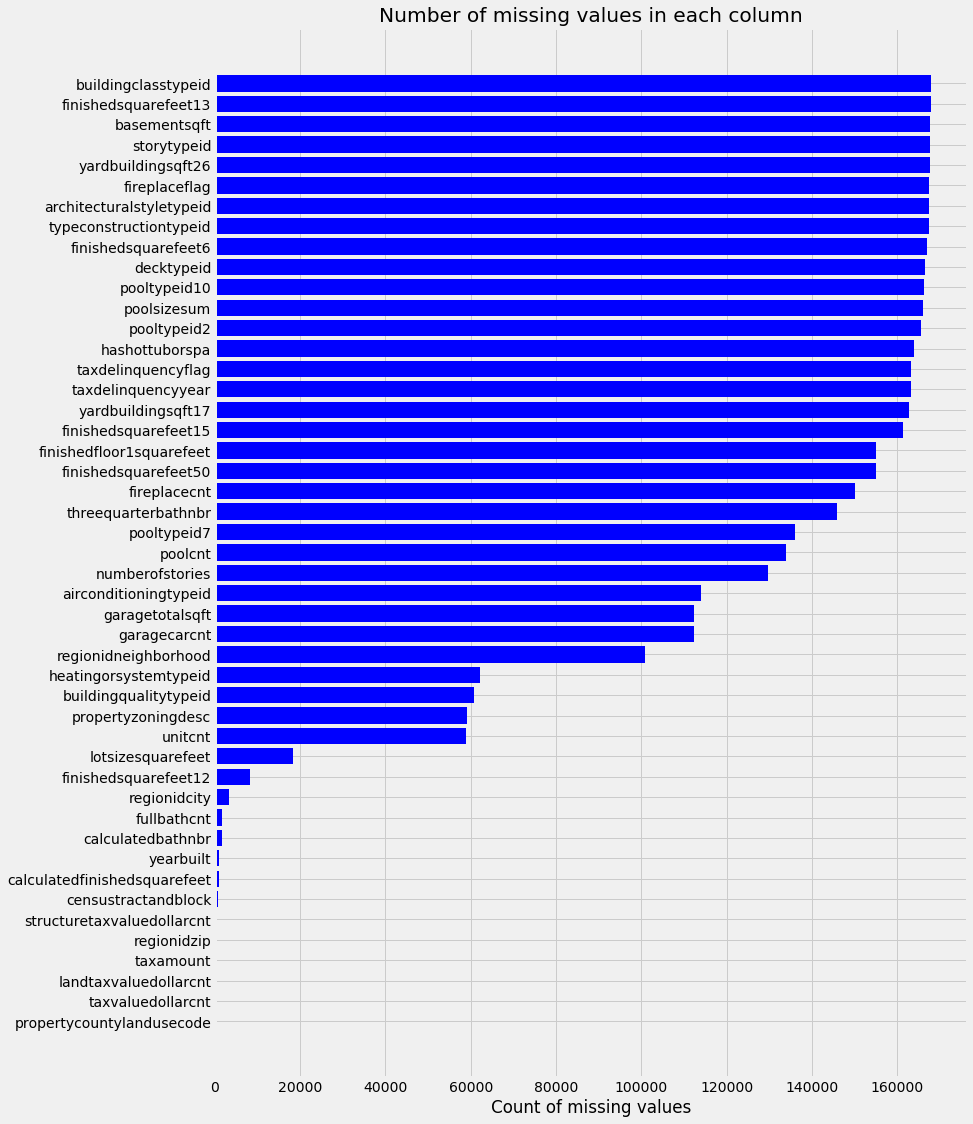

In [10]:
missing_df = df_train_total.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.loc[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')

ind = np.arange(missing_df.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind, missing_df.missing_count.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

In [11]:
#'calculatedfinishedsquarefeet' has the fewest missing values so lets remove the others, note also that except for 'finishedsquarefeet12' the rest have large amount of missing values anyways. 
#Also if you look at my script in https://www.kaggle.com/nikunjm88/creating-additional-features 'calculatedfinishedsquarefeet' appears to be the most important variable
dropcols = ['finishedsquarefeet12','finishedsquarefeet13', 'finishedsquarefeet15','finishedsquarefeet6']

#finishedsquarefeet50 and finishedfloor1squarefeet are the exactly the same information according to the dictionary descriptions, lets remove finishedsquarefeet50 as it has more missing values
dropcols.append('finishedsquarefeet50')

#'bathroomcnt' and 'calculatedbathnbr' and 'fullbathcnt' seem to be the same information aswell according to the dictionary descriptions. Choose 'bathroomcnt' as has no missing values, so remove the other two
dropcols.append('calculatedbathnbr')
dropcols.append('fullbathcnt')

In [12]:
#The below variables are flags and lets assume if they are NA's it means the object does not exist so lets fix this
index = df_train_total.hashottuborspa.isnull()
df_train_total.loc[index,'hashottuborspa'] = "None"

# pooltypeid10(does home have a Spa or hot tub) seems to be inconcistent with the 'hashottuborspa' field - these two fields should have the same information I assume?
print(df_train_total.hashottuborspa.value_counts())
print(df_train_total.pooltypeid10.value_counts())

#lets remove 'pooltypeid10' as has more missing values
dropcols.append('pooltypeid10')

#Assume if the pooltype id is null then pool/hottub doesnt exist 
index = df_train_total.pooltypeid2.isnull()
df_train_total.loc[index,'pooltypeid2'] = 0

index = df_train_total.pooltypeid7.isnull()
df_train_total.loc[index,'pooltypeid7'] = 0

index = df_train_total.poolcnt.isnull()
df_train_total.loc[index,'poolcnt'] = 0

None    163983
True      3905
Name: hashottuborspa, dtype: int64
1.0    1627
Name: pooltypeid10, dtype: int64


In [13]:
#Theres more missing values in the 'poolsizesum' then in 'poolcnt', Let's fill in median values for poolsizesum where pool count is >0 and missing. I think this is sensible assumption as residential pool sizes are fairly standard size I guess in the U.S.
#Also the poolsizesum doesn't seem to be much of an important variable (https://www.kaggle.com/nikunjm88/creating-additional-features) so imputing with the median hopefully won't cause too much of an issue
print(df_train_total.poolsizesum.isnull().sum())
print(df_train_total.poolcnt.value_counts())

#Fill in those properties that have a pool with median pool value
poolsizesum_median = df_train_total.loc[df_train_total['poolcnt'] > 0, 'poolsizesum'].median()
df_train_total.loc[(df_train_total['poolcnt'] > 0) & (df_train_total['poolsizesum'].isnull()), 'poolsizesum'] = poolsizesum_median

#If it doesn't have a pool then poolsizesum is 0 by default
df_train_total.loc[(df_train_total['poolcnt'] == 0), 'poolsizesum'] = 0


166050
0.0    133810
1.0     34078
Name: poolcnt, dtype: int64


In [14]:
#There seems to be inconsistency between the fireplaceflag and fireplace cnt - my guess is that these should be the same
print(df_train_total.fireplaceflag.isnull().sum())
print(df_train_total.fireplacecnt.isnull().sum())

#There seems to be 80668 properties without fireplace according to the 'fireplacecnt' but the 'fireplace flag' says they are 90053 missing values
#Lets instead create the fireplaceflag from scratch using 'fireplacecnt' as there are less missing values here
df_train_total['fireplaceflag']= "No"
df_train_total.loc[df_train_total['fireplacecnt']>0,'fireplaceflag']= "Yes"

index = df_train_total.fireplacecnt.isnull()
df_train_total.loc[index,'fireplacecnt'] = 0

#Tax deliquency flag - assume if it is null then doesn't exist
index = df_train_total.taxdelinquencyflag.isnull()
df_train_total.loc[index,'taxdelinquencyflag'] = "None"

167494
149992


In [15]:
#Same number of missing values between garage count and garage size - assume this is because when there are properties with no garages then both variables are NA
print(df_train_total.garagecarcnt.isnull().sum())
print(df_train_total.garagetotalsqft.isnull().sum())

#Assume if Null in garage count it means there are no garages
index = df_train_total.garagecarcnt.isnull()
df_train_total.loc[index,'garagecarcnt'] = 0

#Likewise no garage means the size is 0 by default
index = df_train_total.garagetotalsqft.isnull()
df_train_total.loc[index,'garagetotalsqft'] = 0

#Let's fill in some missing values using the most common value for those variables where this might be a sensible approach
#AC Type - Mostly 1's, which corresponds to central AC. Reasonable to assume most other properties are similar.
df_train_total['airconditioningtypeid'].value_counts()
index = df_train_total.airconditioningtypeid.isnull()
df_train_total.loc[index,'airconditioningtypeid'] = 1

112431
112431


In [16]:
#heating or system - Mostly 2, which corresponds to central heating so seems reasonable to assume most other properties have central heating  
print(df_train_total['heatingorsystemtypeid'].value_counts())
index = df_train_total.heatingorsystemtypeid.isnull()
df_train_total.loc[index,'heatingorsystemtypeid'] = 2

2.0     71945
7.0     29638
24.0     1921
6.0      1747
20.0      201
13.0      136
18.0       48
1.0        26
10.0        5
11.0        2
14.0        2
12.0        1
Name: heatingorsystemtypeid, dtype: int64


In [17]:
# 'threequarterbathnbr' - not an important variable according to https://www.kaggle.com/nikunjm88/creating-additional-features, so fill with most common value
print(df_train_total['threequarterbathnbr'].value_counts())
index = df_train_total.threequarterbathnbr.isnull()
df_train_total.loc[index,'threequarterbathnbr'] = 1

1.0    21934
2.0      165
3.0       14
7.0        1
4.0        1
Name: threequarterbathnbr, dtype: int64


In [18]:
missingvalues_prop = (df_train_total.isnull().sum()/len(df_train_total)).reset_index()
missingvalues_prop.columns = ['field','proportion']
missingvalues_prop = missingvalues_prop.sort_values(by = 'proportion', ascending = False)
print(missingvalues_prop)
missingvaluescols = missingvalues_prop[missingvalues_prop['proportion'] > 0.97].field.tolist()
dropcols = dropcols + missingvaluescols
df_train_total = df_train_total.drop(dropcols, axis=1)

                           field  proportion
8            buildingclasstypeid    0.999815
15          finishedsquarefeet13    0.999553
43                   storytypeid    0.999446
5                   basementsqft    0.999446
48            yardbuildingsqft26    0.999017
4       architecturalstyletypeid    0.997212
45        typeconstructiontypeid    0.996891
18           finishedsquarefeet6    0.995193
11                    decktypeid    0.992424
31                  pooltypeid10    0.990309
58            taxdelinquencyyear    0.972083
47            yardbuildingsqft17    0.969986
16          finishedsquarefeet15    0.960676
12      finishedfloor1squarefeet    0.923205
17          finishedsquarefeet50    0.923205
50               numberofstories    0.772652
40          regionidneighborhood    0.600936
9          buildingqualitytypeid    0.361455
36            propertyzoningdesc    0.351812
46                       unitcnt    0.350228
28             lotsizesquarefeet    0.109645
14        

In [19]:
def fillna_knn( df, base, target, fraction = 1, threshold = 10, n_neighbors = 5 ):
    assert isinstance( base , list ) or isinstance( base , np.ndarray ) and isinstance( target, str ) 
    whole = [ target ] + base
    
    miss = df[target].isnull()
    notmiss = ~miss 
    nummiss = miss.sum()
    
    enc = OneHotEncoder()
    X_target = df.loc[ notmiss, whole ].sample( frac = fraction )
    
    enc.fit( X_target[ target ].unique().reshape( (-1,1) ) )
    
    Y = enc.transform( X_target[ target ].values.reshape((-1,1)) ).toarray()
    X = X_target[ base  ]
    
    print( 'fitting' )
    n_neighbors = n_neighbors
    clf = neighbors.KNeighborsClassifier( n_neighbors, weights = 'uniform' )
    clf.fit( X, Y )
    
    print( 'the shape of active features: ' ,enc.active_features_.shape )
    
    print( 'predicting' )
    Z = clf.predict(df.loc[miss, base])
    
    numunperdicted = Z[:,0].sum()
    if numunperdicted / nummiss *100 < threshold :
        print( 'writing result to df' )    
        df.loc[ miss, target ]  = np.dot( Z , enc.active_features_ )
        print( 'num of unperdictable data: ', numunperdicted )
        return enc
    else:
        print( 'out of threshold: {}% > {}%'.format( numunperdicted / nummiss *100 , threshold ) )

#function to deal with variables that are actually string/categories
def zoningcode2int( df, target ):
    storenull = df[ target ].isnull()
    enc = LabelEncoder( )
    df[ target ] = df[ target ].astype( str )

    print('fit and transform')
    df[ target ]= enc.fit_transform( df[ target ].values )
    print( 'num of categories: ', enc.classes_.shape  )
    df.loc[ storenull, target ] = np.nan
    print('recover the nan value')
    return enc

In [21]:
#buildingqualitytypeid - assume it is the similar to the nearest property. Probably makes senses if its a property in a block of flats, i.e if block was built all at the same time and therefore all flats will have similar quality 
#Use the same logic for propertycountylandusecode (assume it is same as nearest property i.e two properties right next to each other are likely to have the same code) & propertyzoningdesc. 
#These assumptions are only reasonable if you actually have nearby properties to the one with the missing value

fillna_knn( df = df_train_total,
                  base = [ 'latitude', 'longitude' ] ,
                  target = 'buildingqualitytypeid', fraction = 0.15, n_neighbors = 1 )


zoningcode2int( df = df_train_total,
                            target = 'propertycountylandusecode' )
fillna_knn( df = df_train_total,
                  base = [ 'latitude', 'longitude' ] ,
                  target = 'propertycountylandusecode', fraction = 0.15, n_neighbors = 1 )

zoningcode2int( df = df_train_total,
                            target = 'propertyzoningdesc' )

fillna_knn( df = df_train_total,
                  base = [ 'latitude', 'longitude' ] ,
                  target = 'propertyzoningdesc', fraction = 0.15, n_neighbors = 1 )

#regionidcity, regionidneighborhood & regionidzip - assume it is the same as the nereast property. 
#As mentioned above, this is ok if there's a property very nearby to the one with missing values (I leave it up to the reader to check if this is the case!)
fillna_knn( df = df_train_total,
                  base = [ 'latitude', 'longitude' ] ,
                  target = 'regionidcity', fraction = 0.15, n_neighbors = 1 )

fillna_knn( df = df_train_total,
                  base = [ 'latitude', 'longitude' ] ,
                  target = 'regionidneighborhood', fraction = 0.15, n_neighbors = 1 )

fillna_knn( df = df_train_total,
                  base = [ 'latitude', 'longitude' ] ,
                  target = 'regionidzip', fraction = 0.15, n_neighbors = 1 )

#unitcnt - the number of structures the unit is built into. Assume it is the same as the nearest properties. If the property with missing values is in a block of flats or in a terrace street then this is probably ok - but again I leave it up to the reader to check if this is the case!
fillna_knn( df = df_train_total,
                  base = [ 'latitude', 'longitude' ] ,
                  target = 'unitcnt', fraction = 0.15, n_neighbors = 1 )

#yearbuilt - assume it is the same as the nearest property. This assumes properties all near to each other were built around the same time
fillna_knn( df = df_train_total,
                  base = [ 'latitude', 'longitude' ] ,
                  target = 'yearbuilt', fraction = 0.15, n_neighbors = 1 )

#lot size square feet - not sure what to do about this one. Lets use nearest neighbours. Assume it has same lot size as property closest to it
fillna_knn( df = df_train_total,
                  base = [ 'latitude', 'longitude' ] ,
                  target = 'lotsizesquarefeet', fraction = 0.15, n_neighbors = 1 )

fitting
('the shape of active features: ', (12,))
predicting


ValueError: Found array with 0 sample(s) (shape=(0, 2)) while a minimum of 1 is required.

In [ ]:
#Let's check whats missing still
print(df_train_total.isnull().sum())

In [26]:
df_train_total=df_train_total.assign(diff_cal_fin=lambda x: x.calculatedfinishedsquarefeet-x.finishedfloor1squarefeet)

In [ ]:
df_train_total.airconditioningtypeid
df_train_total.fips
df_train_total.fireplaceflag
df_train_total.hashottuborspa
df_train_total.heatingorsystemtypeid
df_train_total.poolcnt
df_train_total.propertylandusetypeid
df_train_total.regionidcity
df_train_total.unitcnt

In [52]:
df_train_total['month']=df_train_total['month'].astype('category')

In [64]:
df_total = pd.concat([df_train_total, pd.get_dummies(df_train_total.month)], axis=1)
df_total

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,03,04,05,06,07,08,09,10,11,12
0,11016594,0.027600,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,...,0,0,0,0,0,0,0,0,0,0
1,14366692,-0.168400,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,12098116,-0.004000,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,...,0,0,0,0,0,0,0,0,0,0
3,12643413,0.021800,2016-01-02,1.0,NaN,NaN,2.0,2.0,NaN,4.0,...,0,0,0,0,0,0,0,0,0,0
4,14432541,-0.005000,2016-01-02,NaN,NaN,NaN,2.5,4.0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
5,11509835,-0.270500,2016-01-02,1.0,NaN,NaN,4.0,4.0,NaN,1.0,...,0,0,0,0,0,0,0,0,0,0
6,12286022,0.044000,2016-01-02,NaN,NaN,NaN,1.0,2.0,NaN,7.0,...,0,0,0,0,0,0,0,0,0,0
7,17177301,0.163800,2016-01-02,NaN,NaN,NaN,2.5,3.0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
8,14739064,-0.003000,2016-01-02,NaN,NaN,NaN,1.0,2.0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
9,14677559,0.084300,2016-01-03,NaN,NaN,NaN,2.0,2.0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


In [132]:
y = df_train_total['logerror']
X = df_train_total[['S1','S2','S3','S4']]
pd_change_category_by_names(X,['S1','S2','S3','S4'])
X=sm.add_constant(X)
linear_regression = sm.OLS(y,X,missing='drop')
fitted_model = linear_regression.fit()

S1 is changed to category
---------------------------------
S2 is changed to category
---------------------------------
S3 is changed to category
---------------------------------
S4 is changed to category
---------------------------------
S1    category
S2    category
S3    category
S4    category
dtype: object


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [92]:
df_train_total['S1']=df_total["03"]+df_total["04"]+df_total["05"]
df_train_total['S2']=df_total["06"]+df_total["07"]+df_total["08"]
df_train_total['S3']=df_total["09"]+df_total["10"]+df_total["11"]
df_train_total['S4']=df_total["12"]+df_total["01"]+df_total["02"]

In [ ]:
df_train

In [ ]:
df_train_total.airconditioningtypeid
df_train_total.fips
df_train_total.fireplaceflag
df_train_total.hashottuborspa
df_train_total.heatingorsystemtypeid
df_train_total.poolcnt
df_train_total.propertylandusetypeid
df_train_total.regionidcity
df_train_total.unitcnt

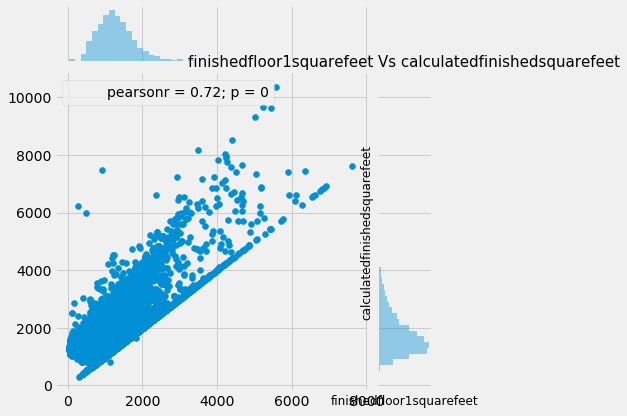

NameError: name 'df_train' is not defined

In [93]:
plt.figure(figsize=(12,12))
sns.jointplot(x=df_train_total.finishedfloor1squarefeet.values, y=df_train_total.calculatedfinishedsquarefeet.values)
plt.ylabel('calculatedfinishedsquarefeet', fontsize=12)
plt.xlabel('finishedfloor1squarefeet', fontsize=12)
plt.title("finishedfloor1squarefeet Vs calculatedfinishedsquarefeet", fontsize=15)
plt.show()

#There are some properties where finishedfloor1squarefeet and calculatedfinishedsquarefeetare are both exactly the same - probably because its a studio flat of some sort so that the area on the first floor is equivalent to the total area, lets see how many there are
#For now assume if the number of stories is 1 then the finishedfloor1squarefeet is the same as calculatedfinishedsquarefeet
df_train_total.loc[(df_train_total['finishedfloor1squarefeet'].isnull()) & (df_train_total['numberofstories']==1),'finishedfloor1squarefeet'] = df_train.loc[(df_train_total['finishedfloor1squarefeet'].isnull()) & (df_train_total['numberofstories']==1),'calculatedfinishedsquarefeet']

#I also discovered that there seems to be two properties that have finishedfloor1squarefeet greater than calculated finishedsquarefeet. Notice also that they have big logerrors aswell - my guess is that the Zillow House price model found it difficult to predict these points due to the fact that they probably had potentially 'incorrect' data input values?
#Discussion point - should we be removing these points or leave them in as they are or 'fix' them? I think it really depends on whether the test data has similar points which may be wrong as we'll want to predict big log errors for these incorrect points aswell I guess...
#For now just remove them.
print(df_train_total.loc[df_train_total['calculatedfinishedsquarefeet']<df_train_total['finishedfloor1squarefeet']])
droprows = df_train_total.loc[df_train['calculatedfinishedsquarefeet']<df_train_total['finishedfloor1squarefeet']].index
df_train = df_train_total.drop(droprows)

structuretaxvaluedollarcnt      1.000000
taxvaluedollarcnt               0.810322
taxamount                       0.796777
finishedsquarefeet12            0.731724
calculatedfinishedsquarefeet    0.706025
finishedfloor1squarefeet        0.610321
calculatedbathnbr               0.607762
landtaxvaluedollarcnt           0.605076
finishedsquarefeet50            0.600848
fullbathcnt                     0.590508
bathroomcnt                     0.575772
fireplacecnt                    0.520031
finishedsquarefeet15            0.462081
garagecarcnt                    0.455734
garagetotalsqft                 0.422432
typeconstructiontypeid          0.365560
yardbuildingsqft17              0.362881
basementsqft                    0.360513
poolsizesum                     0.317672
threequarterbathnbr             0.312420
bedroomcnt                      0.300653
yearbuilt                       0.291056
finishedsquarefeet6             0.254341
numberofstories                 0.223199
buildingqualityt

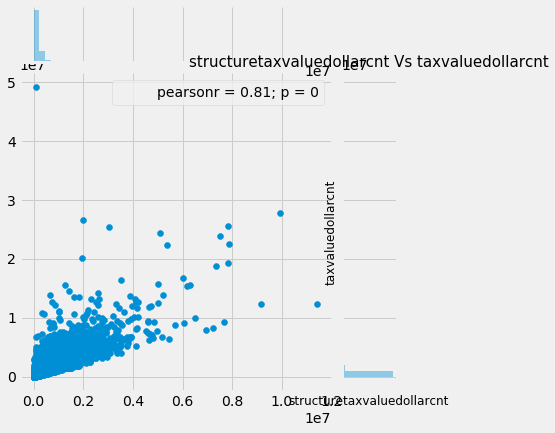

count    4.950000e+02
mean     4.956699e+05
std      1.096206e+06
min      2.200000e+01
25%      6.412300e+04
50%      1.458570e+05
75%      4.539910e+05
max      1.553302e+07
Name: taxvaluedollarcnt, dtype: float64
count    1.678880e+05
mean     4.727125e+05
std      6.028364e+05
min      2.200000e+01
25%      2.026522e+05
50%      3.500000e+05
75%      5.540090e+05
max      4.906124e+07
Name: taxvaluedollarcnt, dtype: float64
parcelid                             0
logerror                             0
transactiondate                      0
airconditioningtypeid           114096
architecturalstyletypeid        167420
basementsqft                    167795
bathroomcnt                          0
bedroomcnt                           0
buildingclasstypeid             167857
buildingqualitytypeid            60684
calculatedbathnbr                 1799
decktypeid                      166616
finishedfloor1squarefeet        154995
calculatedfinishedsquarefeet       863
finishedsquarefeet12  

In [94]:
#taxvaluedollarcnt & landtaxvaluedollarcnt - set it equal to the tax amount (most correlated value). Single story property so assume they are all the same
df_train_total.loc[df_train_total.taxvaluedollarcnt.isnull(),'taxvaluedollarcnt'] = df_train_total.loc[df_train_total.taxvaluedollarcnt.isnull(),'taxamount']
df_train_total.loc[df_train_total.landtaxvaluedollarcnt.isnull(),'landtaxvaluedollarcnt'] = df_train_total.loc[df_train_total.landtaxvaluedollarcnt.isnull(),'taxamount']

#structure tax value dollar - fill this in using its most correlated variable
x =  df_train_total.corr()
print(x.structuretaxvaluedollarcnt.sort_values(ascending = False))

#taxvaluedollarcnt is most correlated variable, let's see how they are related 
plt.figure(figsize=(12,12))
sns.jointplot(x=df_train_total.structuretaxvaluedollarcnt.values, y=df_train_total.taxvaluedollarcnt.values)
plt.ylabel('taxvaluedollarcnt', fontsize=12)
plt.xlabel('structuretaxvaluedollarcnt', fontsize=12)
plt.title("structuretaxvaluedollarcnt Vs taxvaluedollarcnt", fontsize=15)
plt.show()

#Lets look at the distribution of taxvaluedollar cnt where structuretaxvaluedollarcnt is missing just to make sure we are predicting missing values in the body of the taxvaluedollarcnt distribution
print(df_train_total.loc[df_train_total['structuretaxvaluedollarcnt'].isnull(),'taxvaluedollarcnt'].describe())
print(df_train_total['taxvaluedollarcnt'].describe())

#Slightly amend the k nearest neighbour function so it works on regression
def fillna_knn_reg( df, base, target, n_neighbors = 5 ):
    cols = base + [target]
    X_train = df[cols]
    scaler = StandardScaler(with_mean=True, with_std=True).fit(X_train[base].values.reshape(-1, 1))
    rescaledX = scaler.transform(X_train[base].values.reshape(-1, 1))

    X_train = rescaledX[df[target].notnull()]
    Y_train = df.loc[df[target].notnull(),target].values.reshape(-1, 1)

    knn = KNeighborsRegressor(n_neighbors, n_jobs = -1)    
    # fitting the model
    knn.fit(X_train, Y_train)
    # predict the response
    X_test = rescaledX[df[target].isnull()]
    pred = knn.predict(X_test)
    df.loc[df_train_total[target].isnull(),target] = pred
    return

#fill in structuretaxvaluedollarcnt using taxvaluedollarcnt as per the above
fillna_knn_reg(df = df_train_total, base = ['taxvaluedollarcnt'], target = 'structuretaxvaluedollarcnt')

#Do the same thing for tax amount, as taxvaluedollarcnt is its most correlated variable
fillna_knn_reg(df = df_train_total, base = ['taxvaluedollarcnt'], target = 'taxamount')
print(df_train_total.isnull().sum())

In [95]:
catcols+=['longitude','latitude','assessmentyear','year','month','S1','S2','S3','S4']
def pd_change_category_by_names(data_frame,names):
    for i,col_name in enumerate(data_frame.dtypes.index):
        if col_name in names:
            data_frame[col_name] = data_frame[col_name].astype('category')
            print(col_name+" is changed to category")
            print("---------------------------------")
    print(data_frame.dtypes)

In [96]:
pd_change_category_by_names(df_train_total,catcols)

airconditioningtypeid is changed to category
---------------------------------
architecturalstyletypeid is changed to category
---------------------------------
buildingclasstypeid is changed to category
---------------------------------
buildingqualitytypeid is changed to category
---------------------------------
decktypeid is changed to category
---------------------------------
fips is changed to category
---------------------------------
hashottuborspa is changed to category
---------------------------------
heatingorsystemtypeid is changed to category
---------------------------------
latitude is changed to category
---------------------------------
longitude is changed to category
---------------------------------
pooltypeid10 is changed to category
---------------------------------
pooltypeid2 is changed to category
---------------------------------
pooltypeid7 is changed to category
---------------------------------
propertycountylandusecode is changed to category
------------

In [97]:
df_train_total.airconditioningtypeid*df_train_total['S1']

TypeError: Categorical cannot perform the operation *

In [ ]:
new_cols=['finishedfloor1squarefeet',
'garagetotalsqft',
'lotsizesquarefeet',
'poolsizesum']

In [ ]:
for i,value in enumerate(new_cols):
    print(str(i)+":"+value)
    df_train_total=eval("df_train_total.assign(new_{}=lambda x: x.{} /x.calculatedfinishedsquarefeet)".format(value,value))

In [ ]:
names=list(df_train_total.columns)
names.remove('parcelid')
names.remove('transactiondate')
names.remove('logerror')
x_names=names
y_name='logerror'

In [ ]:
x_names

In [31]:
import h2o

In [32]:
h2o.init(nthreads = -1, max_mem_size = 8)

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,14 mins 03 secs
H2O cluster version:,3.10.4.8
H2O cluster version age:,4 months and 24 days !!!
H2O cluster name:,H2O_from_python_jjk84_ltm1l6
H2O cluster total nodes:,1
H2O cluster free memory:,6.944 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"
H2O connection url:,http://localhost:54321
H2O connection proxy:,None


In [34]:
df=h2o.H2OFrame(python_obj=df_train_total.to_dict("list"))

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [35]:
splits=df.split_frame(ratios=[0.7])
train=splits[0]
valid=splits[1]

In [36]:
from h2o.estimators.random_forest import H2ORandomForestEstimator
fit1 = H2ORandomForestEstimator(model_id = 'fit1',nfolds = 5)
fit1.train(x=x_names, y=y_name, training_frame=train,validation_frame=valid)
fit1.cross_validation_metrics_summary

drf Model Build progress: |███████████████████████████████████████████████| 100%
Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  fit1


ModelMetricsRegression: drf
** Reported on train data. **

MSE: 0.02818542823580005
RMSE: 0.16788516383468807
MAE: 0.07169136475293035
RMSLE: NaN
Mean Residual Deviance: 0.02818542823580005

ModelMetricsRegression: drf
** Reported on validation data. **

MSE: 0.026735787670415807
RMSE: 0.16351081820606184
MAE: 0.07086453562116923
RMSLE: NaN
Mean Residual Deviance: 0.026735787670415807

ModelMetricsRegression: drf
** Reported on cross-validation data. **

MSE: 0.027820710113093183
RMSE: 0.16679541394502784
MAE: 0.07084943272539476
RMSLE: NaN
Mean Residual Deviance: 0.027820710113093183
Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,0.0708522,0.0007508,0.0708410,0.0694457,0.0699212,0.0721555,0.0718975
mse,0.0278264,0.0015976,0.029104,0.0240023,0.0264994,0.0297141,0.0298121
r2,-0.0082585,0.0021681,-0.0141239,-0.0068008,-0.0057122,-0.0083911,-0.0062646
residual_deviance,0.0278264,0.0015976,0.029104,0.0240023,0.0264994,0.0297141,0.0298121
rmse,0.1666703,0.0048673,0.1705989,0.1549268,0.1627864,0.1723779,0.1726617
rmsle,0.0,NaN,NaN,NaN,NaN,NaN,NaN


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2017-10-15 14:44:12,4 min 41.522 sec,0.0,nan,nan,nan,nan,nan,nan
,2017-10-15 14:44:13,4 min 42.162 sec,1.0,0.2079006,0.0817366,0.0432226,0.2033085,0.0818042,0.0413344
,2017-10-15 14:44:13,4 min 42.712 sec,2.0,0.1967297,0.0786475,0.0387026,0.1794200,0.0771753,0.0321915
,2017-10-15 14:44:14,4 min 43.420 sec,3.0,0.1935905,0.0787936,0.0374773,0.1755578,0.0763862,0.0308205
,2017-10-15 14:44:15,4 min 44.137 sec,4.0,0.1913483,0.0784811,0.0366142,0.1729909,0.0757300,0.0299259
,2017-10-15 14:44:15,4 min 44.694 sec,5.0,0.1890904,0.0776729,0.0357552,0.1709556,0.0748535,0.0292258
,2017-10-15 14:44:16,4 min 45.179 sec,6.0,0.1852916,0.0767210,0.0343330,0.1692570,0.0741088,0.0286479
,2017-10-15 14:44:20,4 min 49.686 sec,15.0,0.1729182,0.0739607,0.0299007,0.1651628,0.0721246,0.0272787
,2017-10-15 14:44:25,4 min 53.881 sec,23.0,0.1697845,0.0728628,0.0288268,0.1642944,0.0715000,0.0269926
,2017-10-15 14:44:30,4 min 58.774 sec,32.0,0.1686807,0.0722675,0.0284532,0.1638750,0.0712013,0.0268550


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
taxamount,2426.4892578,1.0,0.0699827
calculatedfinishedsquarefeet,2250.4343262,0.9274446,0.0649051
yearbuilt,2207.0432129,0.9095623,0.0636536
structuretaxvaluedollarcnt,2203.7873535,0.9082205,0.0635597
month,1993.8754883,0.8217121,0.0575056
---,---,---,---
fireplaceflag,74.1004639,0.0305381,0.0021371
regionidcounty,57.8903542,0.0238577,0.0016696
pooltypeid2,49.9105721,0.0205690,0.0014395
fips,36.5480423,0.0150621,0.0010541



See the whole table with table.as_data_frame()


<bound method ModelBase.cross_validation_metrics_summary of >